# HW 12

**Upload 2 files** to Gradescope:
* **HW12.py** (for the autograder)
* **HW12.ipynb** (for manual grading)

___

### IMDB Movie Database
From [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data): 500 highest rated movies on IMDB from 2006 to 2016, sorted by revenue.

**Read in the file** `'imdb-movie.csv'` with `Title` as the index column. Store the dataframe in `dfmovie`. Make the following changes:

* **Rename** the column 'Runtime (Minutes)' as 'Runtime_min'. (*Hint:* The `.rename(columns={...}, inplace=True)` method takes as input a dictionary containing `old_name:new_name` pairs.)
* **Rename** the column 'Revenue (Millions)' as 'Revenue_mil'.

In [299]:
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
dfmovie = pd.read_csv('imdb-movie.csv', index_col = 'Title')
dfmovie = dfmovie.rename(columns={'Revenue (Millions)': 'Revenue_mil'})

### Movie Descriptions
Write a function **`movie_keyword(word, dfmovie)`** that returns a list of the movies with `Description`s that contain a given word, in alphabetical order. If there are no matches, the function should return an empty list. (*Hint:* Use `.str.contains()`.)

Example:  
`movie_keyword('math', dfmovie)` returns 
```
['Frantz',
 'Hidden Figures',
 'Patriots Day',
 'The Accountant',
 'The Imitation Game',
 'The Man Who Knew Infinity',
 'The imposible']
```

In [302]:
def movie_keyword(word, dfmovie):
    return sorted(dfmovie.Description[dfmovie.Description.str.contains(word)].index)

In [303]:
movie_keyword('math', dfmovie)

['Frantz',
 'Hidden Figures',
 'Patriots Day',
 'The Accountant',
 'The Imitation Game',
 'The Man Who Knew Infinity',
 'The imposible']

### Actors and Actresses
Write a function **`actor_movies(name, dfmovie)`** that returns a list of the movies that an actor or actress has appeared in. The list should be in alphabetical order.

Example:  
`actor_movies('Amy Adams', dfmovie[dfmovie.Year == 2013])` returns
```
['American Hustle', 'Her', 'Man of Steel']
```

In [305]:
def actor_movies(name, dfmovie):
    return sorted(dfmovie.Actors[dfmovie.Actors.str.contains(name)].index)

In [306]:
actor_movies('Amy Adams', dfmovie[dfmovie.Year == 2013])

['American Hustle', 'Her', 'Man of Steel']

### Directors
Write a function **`director_movies(name, dfmovie)`** that returns a list of the movies that a director has made. The list should be in alphabetical order.

  Example:  
`director_movies('Christopher Nolan', dfmovie)` returns
```
['Inception',
 'Interstellar',
 'The Dark Knight',
 'The Dark Knight Rises',
 'The Prestige']
```

In [308]:
def director_movies(name, dfmovie):
    return sorted(dfmovie.Director[dfmovie.Director.str.contains(name)].index)

In [309]:
director_movies('Christopher Nolan', dfmovie)

['Inception',
 'Interstellar',
 'The Dark Knight',
 'The Dark Knight Rises',
 'The Prestige']

Write a function **`director_most_movies(dfmovie)`** that returns a list of the director(s) with the most films. If several directors have the same max number of films, return their names in alphabetical order by first name. (*Hint:* Use `.value_counts()`.)

  Examples:<br>
  `director_most_movies(dfmovie[dfmovie.Year == 2008])` returns
```
['Clint Eastwood']  
```
  <br>

  `director_most_movies(dfmovie[dfmovie.Year < 2011])` returns
```
 ['Christopher Nolan',
   'Danny Boyle',
   'David Fincher',
   'David Yates',
   'Ridley Scott']
```

In [311]:
def director_most_movies(dfmovie):
    director_counts = dfmovie['Director'].value_counts()
    max_movies = director_counts.max()
    top_directors = director_counts[director_counts == max_movies].index.tolist()
    return sorted(top_directors) 

In [312]:
director_most_movies(dfmovie[dfmovie.Year == 2008])

['Clint Eastwood']

In [313]:
director_most_movies(dfmovie[dfmovie.Year < 2011])

['Christopher Nolan',
 'Danny Boyle',
 'David Fincher',
 'David Yates',
 'Ridley Scott']

Write a function **`director_most_revenue(dfmovie)`** that determines the  name of the director with the highest total revenue. Assume that there is a single director. (*Hint:* You may wish to use `groupby`.)

Example:<br>
`director_most_revenue(dfmovie[dfmovie.Year == 2012])`<br>
returns `'Joss Whedon'`.

In [315]:
def director_most_revenue(dfmovie):
    return dfmovie.groupby('Director').Revenue_mil.sum().idxmax()

In [316]:
director_most_revenue(dfmovie[dfmovie.Year== 2012])

'Joss Whedon'

**Create a bar chart** showing the top 10 revenue-generating directors from 2006 to 2012 with the director names on the horizontal axis and the total revenue on the vertical axis.

  <img src="http://www.coloradomath.org/python/movie-dirs-rev.jpg" width="420" height="396" />

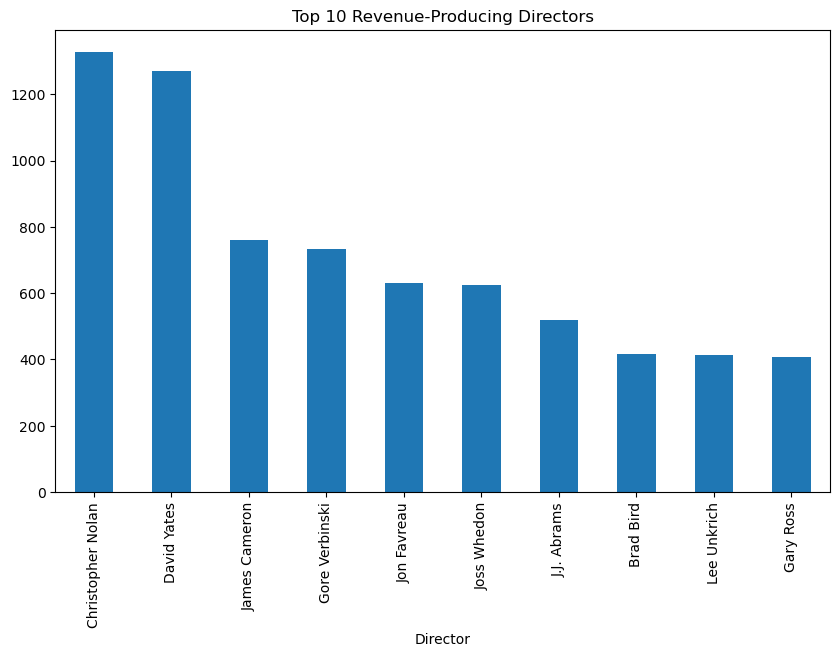

In [318]:
top_directors_revenue = (
    dfmovie[dfmovie.Year.between(2006, 2012)].groupby('Director')['Revenue_mil'].sum().nlargest(10)
)

plt.figure(figsize=(10, 6))
top_directors_revenue.plot(kind='bar')
plt.title('Top 10 Revenue-Producing Directors')
plt.xlabel('Director')
plt.show()


### Genres
Each entry in the `'Genre'` column corresponds to a comma-separated list of genres. 

Write a function **`genres_all(dfmovie)`** that returns an alphabetical list of the possible genres in `dfmovie`. Only include the names that appear between the commas. For example, `'Action, Sci-Fi'` should be split into two genres: `'Action'` and `'Sci-Fi'`.

Example:<br>
`genres_all(dfmovie.head())` returns<br>
`['Action', 'Adventure', 'Crime', 'Drama', 'Fantasy', 'Sci-Fi']`.

In [320]:
dfmovie.head()

,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue_mil,Metascore
Title,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [321]:
def genres_all(dfmovie):
    genre_list = dfmovie.Genre.values.tolist()
    unique = set()
    for genres in genre_list:
        unique.update(genre.strip() for genre in genres.split(','))
    
    return sorted(unique)

In [322]:
genres_all(dfmovie.head())

['Action', 'Adventure', 'Crime', 'Drama', 'Fantasy', 'Sci-Fi']

Write a function **`genres_summary(dfmovie)`** that returns a dataframe with index labels corresponding to the genres in `dfmovie`, and columns corresponding to the genre `Counts`, average `Runtime_min`, average `Rating`, and average `Revenue_mil`. It should call `genres_all()`.

  Example:<br>
  `genres_summary(dfmovie.head())` returns the dataframe
  
|              | Counts | Runtime_min | Rating   | Revenue_mil | 
| :--          | --:    | --:         | --:      | --:         | 
| **Action**   | 5      | 143.400000  | 8.000000 | 701.184000  | 
| **Adventure**| 3      | 140.666667  | 7.633333 | 783.106667  | 
| **Crime**    | 1      | 152.000000  | 9.000000 | 533.320000  | 
| **Drama**    | 1      | 152.000000  | 9.000000 | 533.320000  | 
| **Fantasy**  | 2      | 149.000000  | 7.950000 | 848.570000  | 
| **Sci-Fi**   | 2      | 133.500000  | 7.550000 | 637.730000  |  


In [326]:
def genres_summary(dfmovie):
    unique_genres = genres_all(dfmovie)

    summary = {
        "Counts": [],
        "average Runtime_min": [],
        "average Rating": [],
        "average Revenue_mil": []
    }
    
    for genre in unique_genres:
        genre_rows = dfmovie[dfmovie['Genre'].str.contains(genre, na=False)]
        
        count = len(genre_rows)
        avg_runtime = genre_rows['Runtime (Minutes)'].mean()
        avg_rating = genre_rows['Rating'].mean()
        avg_revenue = genre_rows['Revenue_mil'].mean()
        
        summary["Counts"].append(count)
        summary["average Runtime_min"].append(avg_runtime)
        summary["average Rating"].append(avg_rating)
        summary["average Revenue_mil"].append(avg_revenue)
    
    summary_df = pd.DataFrame(summary, index=unique_genres)
    
    return summary_df

In [328]:
genres_summary(dfmovie.head())

,Counts,average Runtime_min,average Rating,average Revenue_mil
Action,5,143.400000,8.000000,701.184000
Adventure,3,140.666667,7.633333,783.106667
Crime,1,152.000000,9.000000,533.320000
Drama,1,152.000000,9.000000,533.320000
Fantasy,2,149.000000,7.950000,848.570000
Sci-Fi,2,133.500000,7.550000,637.730000


### Ratings and Metascores

Sort the `Rating`s in the database in increasing order and plot them as a line graph.

In [330]:
sorted_rating = sorted(dfmovie.Rating)

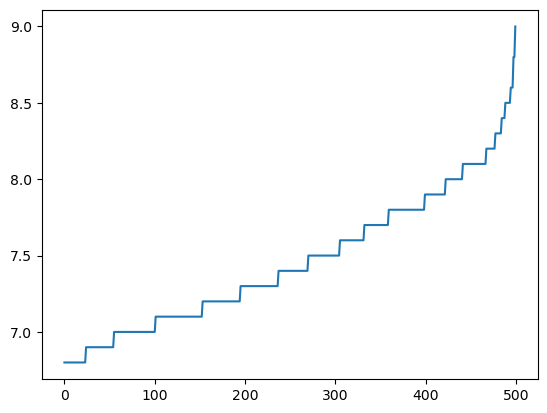

In [332]:
plt.plot(sorted_rating)
plt.show()

Sort the `Metascore`s in the database in increasing order and plot them as a line graph.

In [334]:
sorted_metascore = dfmovie.Metascore.sort_values(axis=0, ascending=True)

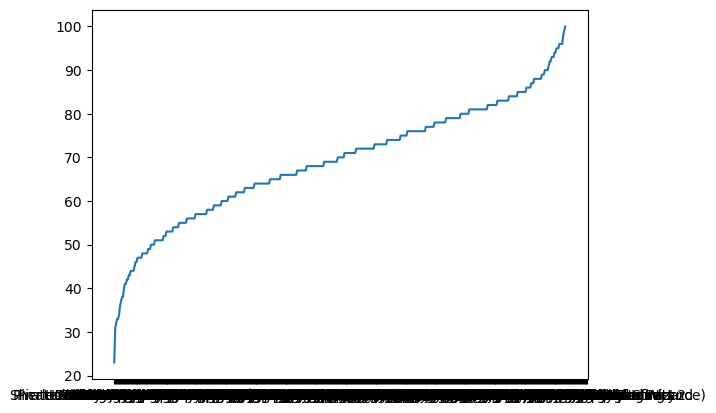

In [336]:
plt.plot(sorted_metascore)
plt.show()

There should be a strong relationship between the `Rating` and `Metascore` columns. 

**Create a scatter plot** with `Rating` on the horizontal axis and `Metascore` on the vertical axis.

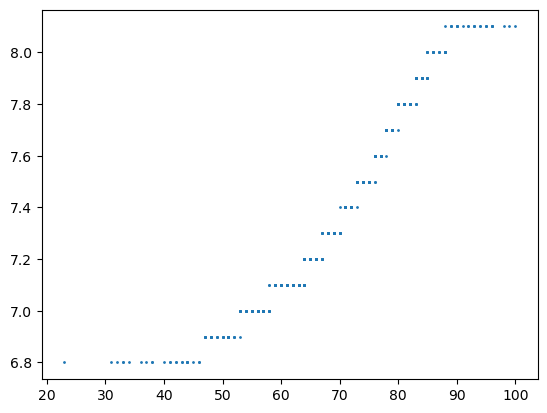

In [339]:
plt.plot(sorted_metascore, sorted_rating, 'o', ms = 1)
plt.show()